In [282]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import shapely as sa
from geopandas import GeoDataFrame
from shapely.geometry import Point

## 1. Loading data

### Loading price data

In [283]:
house_price = pd.read_csv('work/house_price_borough.csv')
rent_price = pd.read_csv('work/rent_price_borough.csv')

### Loading Elizabeth line shapefile (stations and track)

   OBJECTID   STATION_NA  SIZE_ SE_ANNO_CA                       geometry
0         1  Forest Gate  Small       None  POINT (540409.113 185311.628)
1         2   Manor Park  Small       None  POINT (541906.079 185683.241)
2         3       Ilford  Small       None  POINT (543515.859 186487.354)
3         4  Seven Kings  Small       None  POINT (545384.047 187089.399)
4         5    Goodmayes  Small       None  POINT (546470.589 187325.404)


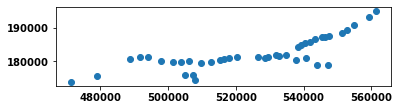

In [284]:
# Loading stations shapefile
tpath = 'work/Elizabeth_line_shapefile/CRL_Stations.shp'
stations = gpd.GeoDataFrame.from_file(tpath,encoding = 'gb18030')
stations.head()    
stations.plot()


print(stations.head())

   OBJECTID     ROUTEDESC    BRANCHDESC DIRECTDESC  \
0         1  Network Rail  Western Spur  Eastbound   
1         2  Network Rail  Western Spur  Eastbound   
2         3  Network Rail  Western Spur  Eastbound   
3         4  Network Rail  Western Spur  Eastbound   
4         5  Network Rail  Western Spur  Eastbound   

                                            geometry  
0  LINESTRING (521936.314 182273.252, 521935.366 ...  
1  LINESTRING (521959.564 182241.351, 521958.663 ...  
2  LINESTRING (521970.633 182264.311, 521969.731 ...  
3  LINESTRING (521961.418 182303.518, 521960.645 ...  
4  LINESTRING (521953.921 182240.761, 521952.973 ...  


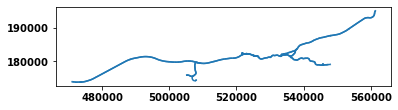

In [285]:
# Loading track shapefile
tpath = 'work/Elizabeth_line_shapefile/CRL_Track.shp'
track = gpd.GeoDataFrame.from_file(tpath,encoding = 'gb18030')
track.head()    
track.plot()



print(track.head())

### Loading London borough data 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        33 non-null     object  
 1   GSS_CODE    33 non-null     object  
 2   HECTARES    33 non-null     float64 
 3   NONLD_AREA  33 non-null     float64 
 4   ONS_INNER   33 non-null     object  
 5   SUB_2009    0 non-null      object  
 6   SUB_2006    0 non-null      object  
 7   geometry    33 non-null     geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 2.2+ KB
None


,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18..."
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19..."
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19..."
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18..."
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19..."


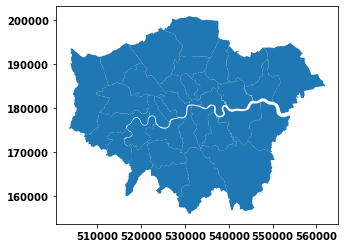

In [286]:
tpath = 'work/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'
borough = gpd.GeoDataFrame.from_file(tpath,encoding = 'gb18030')
borough.head()   
borough.plot()
print(borough.info(verbose=True))

borough

### Reprojection

In [287]:
# Detecting crs
print(borough.crs)
print(stations.crs)
print(track.crs)

PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
epsg:27700
epsg:27700


In [288]:
# Reprojection
borough= borough.to_crs('epsg:27700')
stations = stations.to_crs('epsg:27700')
track = track.to_crs('epsg:27700')

print(borough.crs)
print(stations.crs)
print(track.crs)

epsg:27700
epsg:27700
epsg:27700


## 2. Manipulating data

### 2.1 house price analysis, by borough

**Mapping**

In [289]:
# Combining price and borough
house_price_merge=pd.merge(borough, house_price, on='GSS_CODE',how='left')
house_price_merge

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,borough,median_2020,median_2022
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Kingston upon Thames,490000,542500
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Croydon,384000,400000
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Bromley,448000,490000
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Hounslow,416375,458250
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Ealing,472500,530000
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18...",Havering,373000,420000
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19...",Hillingdon,420000,460000
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19...",Harrow,455000,540000
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18...",Brent,488500,550000
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19...",Barnet,540000,600000


(155000.0, 202000.0)

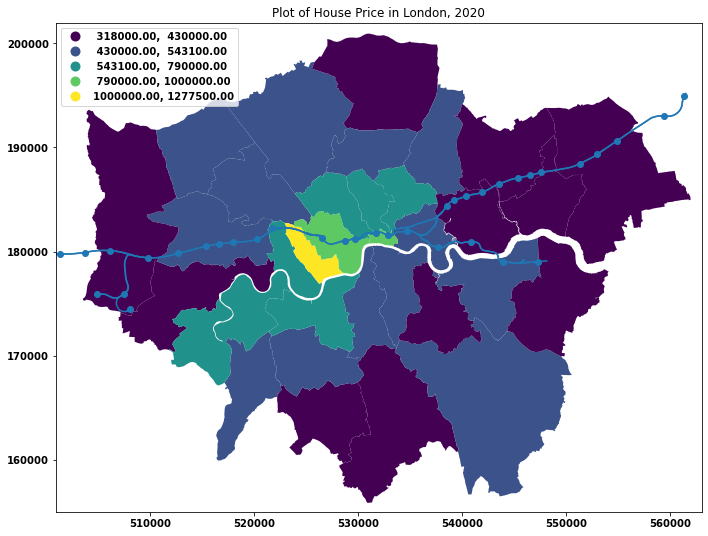

In [290]:
# year 2020 
fig, ax = plt.subplots(1,1, figsize=(12,9))


house_price_merge.plot(ax=ax,figsize=(12,8), marker='*', markersize=0.25,  
         column='median_2020', cmap='viridis', legend=True, scheme='fisher_jenks', k=5)
         
stations.plot(ax=ax)
track.plot(ax=ax)
ax.set_title("Plot of House Price in London, 2020")


# Set the x and y limits
ax.set_xlim(501000,563000)
ax.set_ylim(155000,202000)

(155000.0, 202000.0)

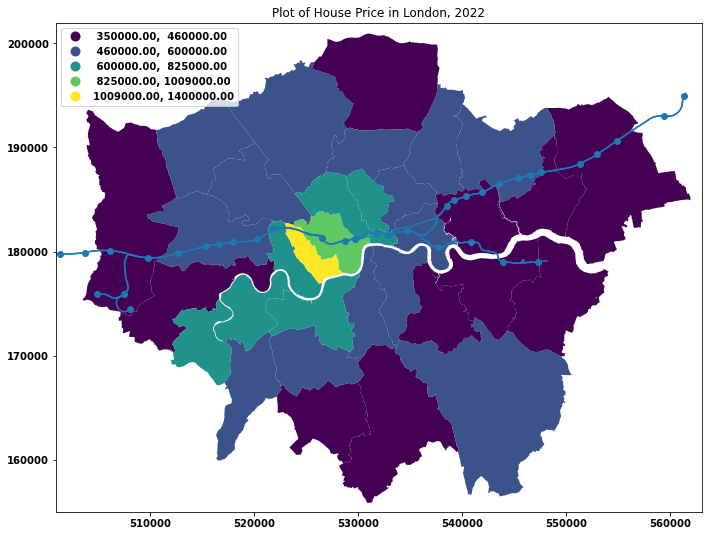

In [291]:
# year 2022
fig, ax = plt.subplots(1,1, figsize=(12,9))


house_price_merge.plot(ax=ax,figsize=(12,8), marker='*', markersize=0.25,  
         column='median_2022', cmap='viridis', legend=True, scheme='fisher_jenks', k=5)
         
stations.plot(ax=ax)
track.plot(ax=ax)
ax.set_title("Plot of House Price in London, 2022")

# Set the x and y limits
ax.set_xlim(501000,563000)
ax.set_ylim(155000,202000)

**Graph**

In [292]:
# Calculating the increase rate 
increase_rate_house = (house_price_merge['median_2022']-house_price_merge['median_2020'])/(house_price_merge['median_2020'])

# Adding as a new column
s = pd.Series(increase_rate_house)
house_price_merge.insert(11, 'increase_rate_house', s)

# Converting data to percentage
house_price_merge[u'increase_rate_house'] = house_price_merge[u'increase_rate_house'].apply(lambda x: format(x, '.2%'))

house_price_merge

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,borough,median_2020,median_2022,increase_rate_house
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Kingston upon Thames,490000,542500,10.71%
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Croydon,384000,400000,4.17%
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Bromley,448000,490000,9.38%
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Hounslow,416375,458250,10.06%
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Ealing,472500,530000,12.17%
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18...",Havering,373000,420000,12.60%
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19...",Hillingdon,420000,460000,9.52%
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19...",Harrow,455000,540000,18.68%
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18...",Brent,488500,550000,12.59%
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19...",Barnet,540000,600000,11.11%


Text(0, 0.5, 'Increase rate')

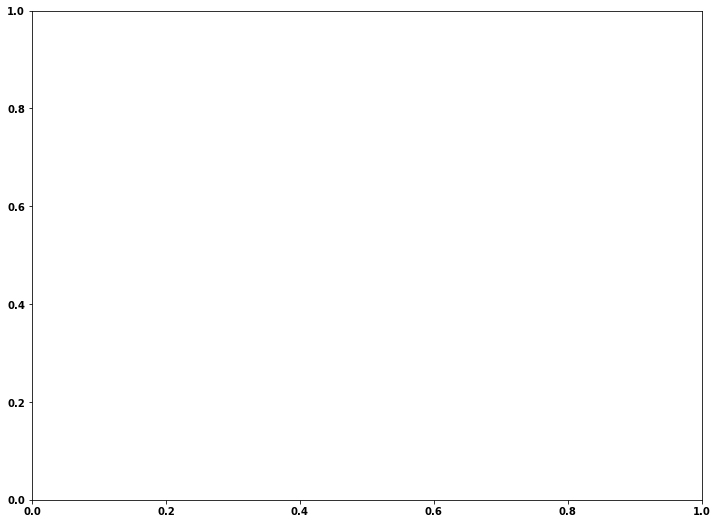

<Figure size 6000x4800 with 0 Axes>

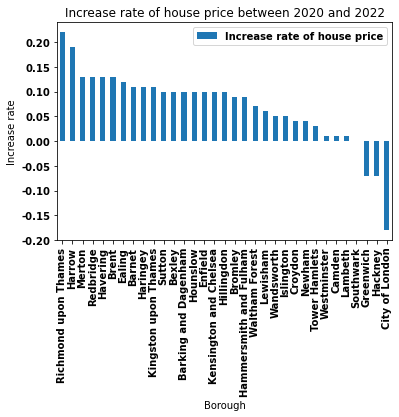

In [299]:
# plot bar chart
plotdata = pd.DataFrame(
    {"Increase rate of house price": [0.22,
0.19 ,
0.13 ,
0.13 ,
0.13 ,
0.13 ,
0.12 ,
0.11 ,
0.11 ,
0.11 ,
0.10 ,
0.10 ,
0.10 ,
0.10 ,
0.10 ,
0.10 ,
0.10 ,
0.09 ,
0.09 ,
0.07 ,
0.06 ,
0.05 ,
0.05 ,
0.04 ,
0.04 ,
0.03 ,
0.01 ,
0.01 ,
0.01 ,
0.00 ,
-0.07 ,
-0.07 ,
-0.18 ]}, 
    index=['Richmond upon Thames',
'Harrow',
'Merton',
'Redbridge',
'Havering',
'Brent',
'Ealing',
'Barnet',
'Haringey',
'Kingston upon Thames',
'Sutton',
'Bexley',
'Barking and Dagenham',
'Hounslow',
'Enfield',
'Kensington and Chelsea',
'Hillingdon',
'Bromley',
'Hammersmith and Fulham',
'Waltham Forest',
'Lewisham',
'Wandsworth',
'Islington',
'Croydon',
'Newham',
'Tower Hamlets',
'Westminster',
'Camden',
'Lambeth',
'Southwark',
'Greenwich',
'Hackney',
'City of London'])

# Plot a bar chart

plt.figure(figsize=(30, 24), dpi=200)
plotdata.plot(kind="bar",title='test')
plt.title("Increase rate of house price between 2020 and 2022")
plt.xlabel("Borough")
plt.ylabel("Increase rate")

Analysis thoughts:

1.House price growth rate reflects the extent of impact 

2.Comparing the growth rate in borough with the citywide growth rate gives a better indication of the impact of the Elizabeth Line on house prices (e.g. if the growth rate in an area is significantly higher than the full growth rate, it means that house price growth in that area is largely due to the establishment of the Elizabeth Line)

### 2.2 rent price analysis, by borough

In [294]:
# Combining price and borough
rent_price_merge=pd.merge(borough, rent_price, on='GSS_CODE',how='left')
rent_price_merge

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,borough_name,median_2020,median_2022
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Kingston upon Thames,1284,1356
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Croydon,1128,1171
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Bromley,1183,1291
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Hounslow,1267,1258
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Ealing,1458,1448
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18...",Havering,1051,1127
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19...",Hillingdon,1147,1165
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19...",Harrow,1241,1265
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18...",Brent,1339,1352
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19...",Barnet,1532,1416


**Mapping**

(155000.0, 202000.0)

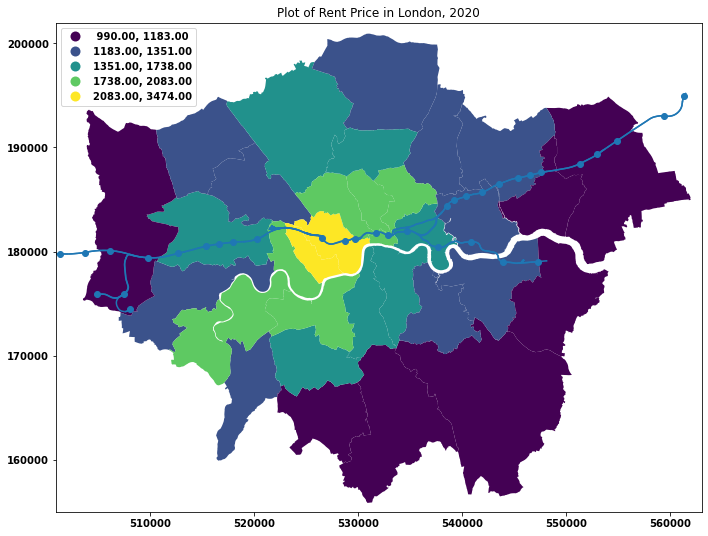

In [295]:
# year 2020 
fig, ax = plt.subplots(1,1, figsize=(12,9))


rent_price_merge.plot(ax=ax,figsize=(12,8), marker='*', markersize=0.25,  
         column='median_2020', cmap='viridis', legend=True, scheme='fisher_jenks', k=5)
         
stations.plot(ax=ax)
track.plot(ax=ax)
ax.set_title("Plot of Rent Price in London, 2020")


# Set the x and y limits
ax.set_xlim(501000,563000)
ax.set_ylim(155000,202000)

(155000.0, 202000.0)

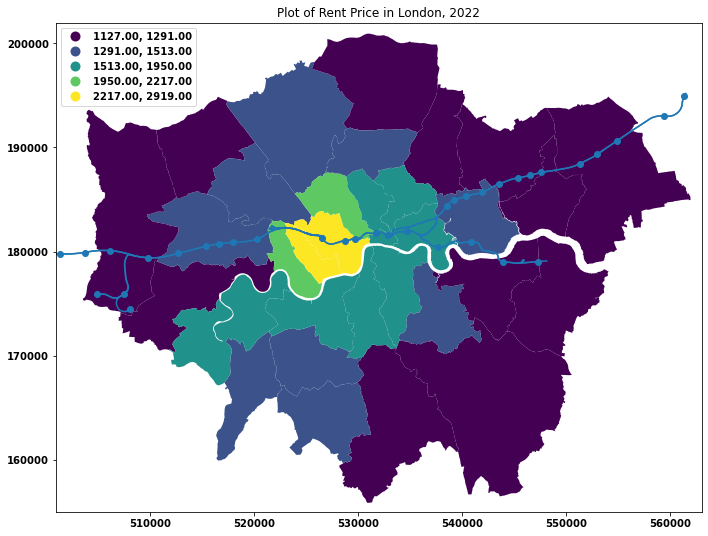

In [296]:
# year 2022
fig, ax = plt.subplots(1,1, figsize=(12,9))


rent_price_merge.plot(ax=ax,figsize=(12,8), marker='*', markersize=0.25,  
         column='median_2022', cmap='viridis', legend=True, scheme='fisher_jenks', k=5)
         
stations.plot(ax=ax)
track.plot(ax=ax)
ax.set_title("Plot of Rent Price in London, 2022")


# Set the x and y limits
ax.set_xlim(501000,563000)
ax.set_ylim(155000,202000)

**Graph**

In [297]:
# Calculating the increase rate 
increase_rate_rent = (rent_price_merge['median_2022']-rent_price_merge['median_2020'])/(rent_price_merge['median_2020'])

# Adding as a new column
s = pd.Series(increase_rate_rent)
rent_price_merge.insert(11, 'increase_rate_rent', s)

# Converting data to percentage
rent_price_merge[u'increase_rate_rent'] = rent_price_merge[u'increase_rate_rent'].apply(lambda x: format(x, '.2%'))

rent_price_merge

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,borough_name,median_2020,median_2022,increase_rate_rent
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",Kingston upon Thames,1284,1356,5.61%
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",Croydon,1128,1171,3.81%
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",Bromley,1183,1291,9.13%
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",Hounslow,1267,1258,-0.71%
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",Ealing,1458,1448,-0.69%
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18...",Havering,1051,1127,7.23%
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19...",Hillingdon,1147,1165,1.57%
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19...",Harrow,1241,1265,1.93%
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18...",Brent,1339,1352,0.97%
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19...",Barnet,1532,1416,-7.57%


Text(0, 0.5, 'Increase rate')

<Figure size 6000x4800 with 0 Axes>

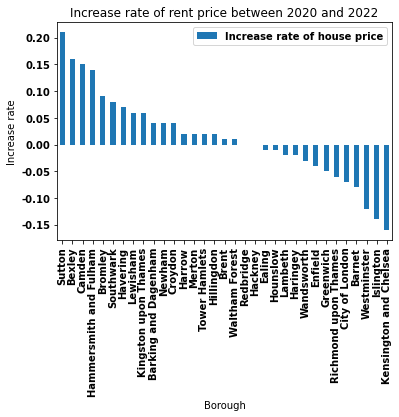

In [298]:
# plot bar chart
plotdata = pd.DataFrame(
    {"Increase rate of house price": [0.21 ,
0.16 ,
0.15 ,
0.14 ,
0.09 ,
0.08 ,
0.07 ,
0.06 ,
0.06 ,
0.04 ,
0.04 ,
0.04 ,
0.02 ,
0.02 ,
0.02 ,
0.02 ,
0.01 ,
0.01 ,
0.00 ,
0.00 ,
-0.01 ,
-0.01 ,
-0.02 ,
-0.02 ,
-0.03 ,
-0.04 ,
-0.05 ,
-0.06 ,
-0.07 ,
-0.08 ,
-0.12 ,
-0.14 ,
-0.16 ]}, 
    index=['Sutton',
'Bexley',
'Camden',
'Hammersmith and Fulham',
'Bromley',
'Southwark',
'Havering',
'Lewisham',
'Kingston upon Thames',
'Barking and Dagenham',
'Newham',
'Croydon',
'Harrow',
'Merton',
'Tower Hamlets',
'Hillingdon',
'Brent',
'Waltham Forest',
'Redbridge',
'Hackney',
'Ealing',
'Hounslow',
'Lambeth',
'Haringey',
'Wandsworth',
'Enfield',
'Greenwich',
'Richmond upon Thames',
'City of London',
'Barnet',
'Westminster',
'Islington',
'Kensington and Chelsea'])

# Plot a bar chart

plt.figure(figsize=(30, 24), dpi=200)
plotdata.plot(kind="bar",title='test')
plt.title("Increase rate of rent price between 2020 and 2022")
plt.xlabel("Borough")
plt.ylabel("Increase rate")